Problem 2: PCA of Constant Maturity Treasure Rates

In [45]:
import pandas as pd

filenames = [
    'DGS1MO.csv',  # 1 month
    'DGS3MO.csv',  # 3 month
    'DGS6MO.csv',  # 6 month
    'DGS1.csv',    # 1 year
    'DGS2.csv',    # 2 year
    'DGS3.csv',    # 3 year
    'DGS5.csv',    # 5 year
    'DGS10.csv',   # 10 year
    'DGS20.csv',   # 20 year
    'DGS30.csv'    # 30 year
]

dfs = []
for file in filenames:
    df = pd.read_csv(file, parse_dates=['observation_date'])
    df = df.rename(columns={'observation_date': 'DATE', df.columns[-1]: file.replace('.csv','')})
    dfs.append(df)


from functools import reduce
df_merged = reduce(lambda left, right: pd.merge(left, right, on='DATE', how='outer'), dfs)
df_merged = df_merged.set_index('DATE')

print(df_merged)


            DGS1MO  DGS3MO  DGS6MO  DGS1  DGS2  DGS3  DGS5  DGS10  DGS20  \
DATE                                                                       
2001-07-31    3.67    3.54    3.47  3.53  3.79  4.06  4.57   5.07   5.61   
2001-08-01    3.65    3.53    3.47  3.56  3.83  4.09  4.62   5.11   5.63   
2001-08-02    3.65    3.53    3.46  3.57  3.89  4.17  4.69   5.17   5.68   
2001-08-03    3.63    3.52    3.47  3.57  3.91  4.22  4.72   5.20   5.70   
2001-08-06    3.62    3.52    3.47  3.56  3.88  4.17  4.71   5.19   5.70   
...            ...     ...     ...   ...   ...   ...   ...    ...    ...   
2008-07-24    1.69    1.65    1.90  2.26  2.61  2.92  3.37   4.03   4.66   
2008-07-25    1.72    1.75    1.95  2.35  2.70  3.01  3.45   4.13   4.75   
2008-07-28    1.68    1.73    1.92  2.28  2.59  2.90  3.34   4.06   4.69   
2008-07-29    1.73    1.72    1.96  2.36  2.65  2.95  3.39   4.09   4.70   
2008-07-30    1.66    1.70    1.90  2.33  2.64  2.93  3.36   4.07   4.69   

           

In [46]:
# Restrict the data from 2001-2008

df_filtered = df_merged.loc[(df_merged.index >= '2001-01-01') & (df_merged.index <= '2008-12-31')]
df_filtered = df_filtered.apply(pd.to_numeric, errors='coerce')
df_filtered = df_filtered.dropna()

print(df_filtered)


            DGS1MO  DGS3MO  DGS6MO  DGS1  DGS2  DGS3  DGS5  DGS10  DGS20  \
DATE                                                                       
2001-07-31    3.67    3.54    3.47  3.53  3.79  4.06  4.57   5.07   5.61   
2001-08-01    3.65    3.53    3.47  3.56  3.83  4.09  4.62   5.11   5.63   
2001-08-02    3.65    3.53    3.46  3.57  3.89  4.17  4.69   5.17   5.68   
2001-08-03    3.63    3.52    3.47  3.57  3.91  4.22  4.72   5.20   5.70   
2001-08-06    3.62    3.52    3.47  3.56  3.88  4.17  4.71   5.19   5.70   
...            ...     ...     ...   ...   ...   ...   ...    ...    ...   
2008-07-24    1.69    1.65    1.90  2.26  2.61  2.92  3.37   4.03   4.66   
2008-07-25    1.72    1.75    1.95  2.35  2.70  3.01  3.45   4.13   4.75   
2008-07-28    1.68    1.73    1.92  2.28  2.59  2.90  3.34   4.06   4.69   
2008-07-29    1.73    1.72    1.96  2.36  2.65  2.95  3.39   4.09   4.70   
2008-07-30    1.66    1.70    1.90  2.33  2.64  2.93  3.36   4.07   4.69   

           

In [47]:
# Resample weekly, split into train (2001-2006) and test (2006-2008), prepare rate changes, PCA

df_weekly = df_filtered.resample('W').last()

df_weekly = df_weekly.fillna(method='ffill')
weekly_changes = df_weekly.diff().dropna()
df_weekly = df_filtered.resample('W').last().fillna(method='ffill')


train = weekly_changes.loc[:'2006-12-31']
test = weekly_changes.loc['2007-01-01':]

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(train)
train_pca = pca.transform(train)
test_pca = pca.transform(test)


/tmp/ipython-input-2958495849.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_weekly = df_weekly.fillna(method='ffill')
/tmp/ipython-input-2958495849.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_weekly = df_filtered.resample('W').last().fillna(method='ffill')


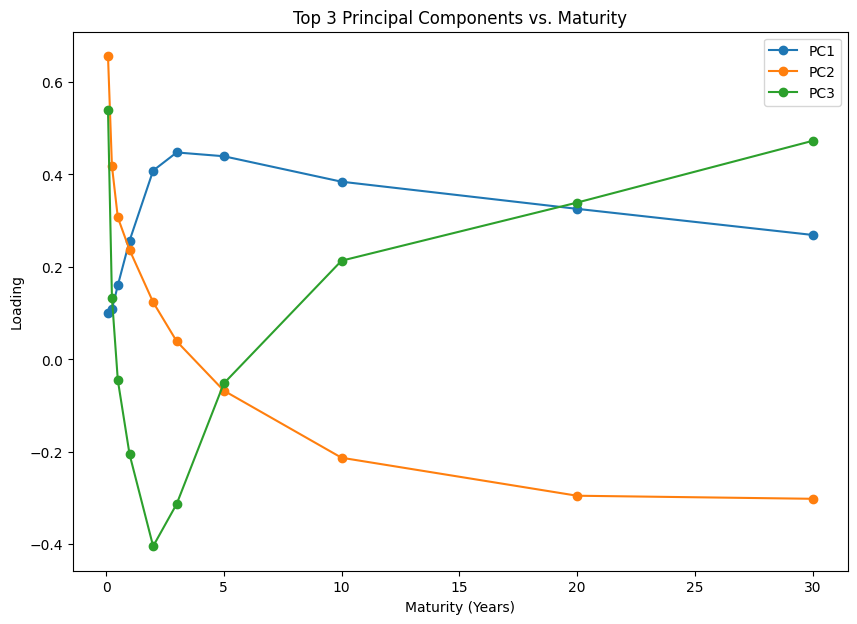

In [48]:
# (d) Plot top 3 principal components as a function of maturity, interpret components


import matplotlib.pyplot as plt
import numpy as np

maturities = [1/12, 0.25, 0.5, 1, 2, 3, 5, 10, 20, 30]  # years
pcs = pca.components_

plt.figure(figsize=(10,7))
for i in range(3):
    plt.plot(maturities, pcs[i], marker='o', label=f'PC{i+1}')
plt.xlabel('Maturity (Years)')
plt.ylabel('Loading')
plt.title('Top 3 Principal Components vs. Maturity')
plt.legend()
plt.show()


Interpretation:

PC1: Usually represents a parallel shift (level) in the curve.

PC2: Represents a slope change (steepening/flattening).

PC3: Often captures curvature.



In [50]:
# (e) Compute explained variance for train and test sets

# Reconstruct the rates using only 3 PCs
train_recon = pca.inverse_transform(train_pca)
test_recon = pca.inverse_transform(test_pca)

# Variance along features columns, then sum
var_train = 1 - np.sum(np.var(train - train_recon, axis=0)) / np.sum(np.var(train, axis=0))
var_test = 1 - np.sum(np.var(test - test_recon, axis=0)) / np.sum(np.var(test, axis=0))

print(f"Percentage variance captured (train): {pca.explained_variance_ratio_.sum()*100:.2f}%")
print(f"Variance explained (train, total): {var_train*100:.2f}%")
print(f"Variance explained (test): {var_test*100:.2f}%")


Percentage variance captured (train): 95.88%
Variance explained (train, total): 95.88%
Variance explained (test): 95.08%
